In [1]:
#!pip install --upgrade kneed
#!pip install yellowbrick

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from yellowbrick.cluster import InterclusterDistance
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
import matplotlib.cm as cm

from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator



In [3]:
df = pd.read_csv('customers.csv')

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum() #check if have any null value

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#dimension reduction
df.drop(['CustomerID'],axis=1, inplace=True) #drop unncessary data for data analysis

In [8]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


/Users/dufflelee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dufflelee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dufflelee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

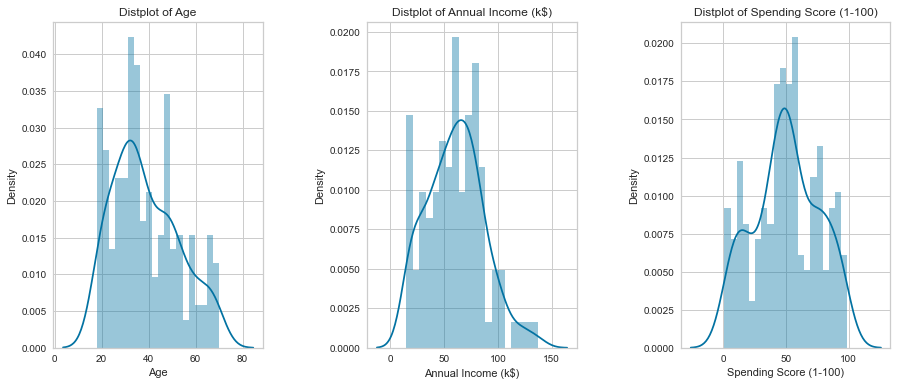

In [9]:
#density of age, income and spending
plt.figure(1, figsize=(15,6))
n=0

#for loop to rotate through data to visualize
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n) #plot 1 row, 3 cols and n next data
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins =20)
    plt.title('Distplot of {}'.format(x))
plt.show()
    

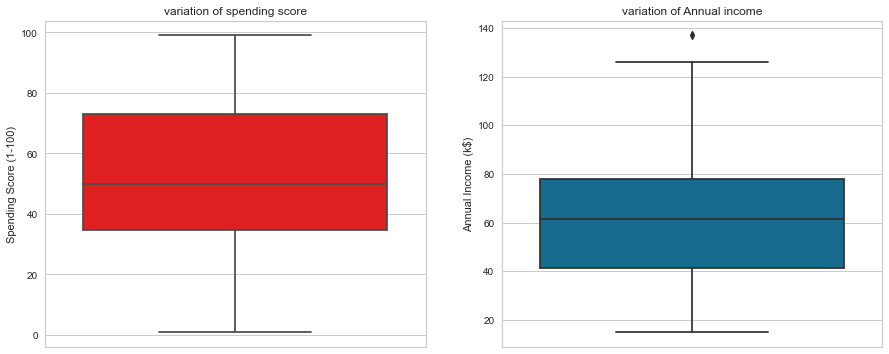

In [10]:
#variation of spending score VS annual income 
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red").set(title='variation of spending score')
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"]).set(title='variation of Annual income')

plt.show()

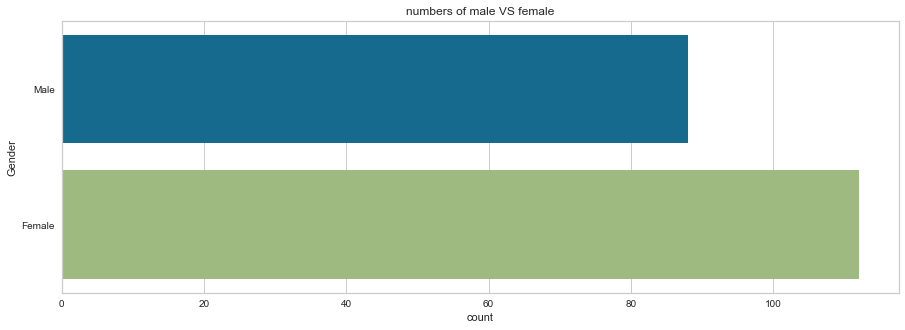

In [11]:
#distribution of male and female 
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.title('numbers of male VS female')
plt.show()

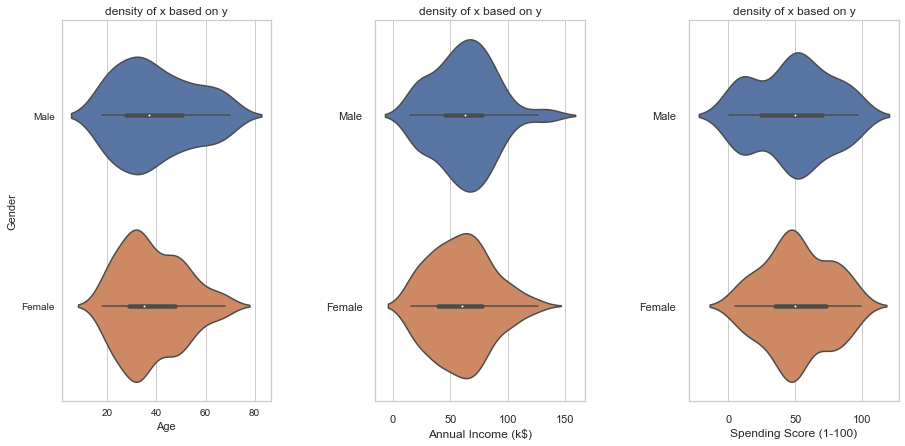

In [12]:
#density of age, income and spending by gender
plt.figure(1, figsize=(15,7))
n=0

for cols1 in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set_theme(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols1, y='Gender', data=df)
    plt.ylabel('Gender' if n==1 else'')
    plt.title('density of x based on y')
plt.show()


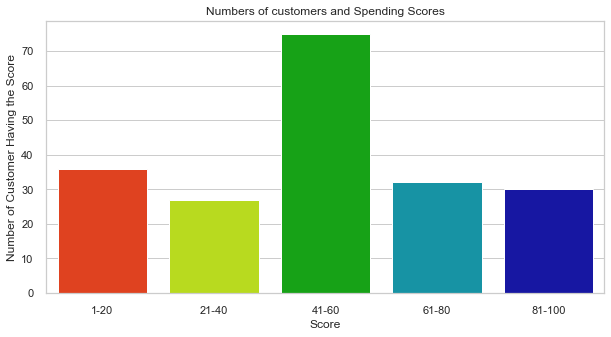

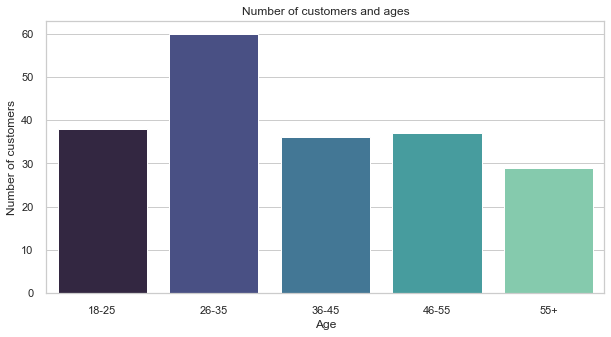

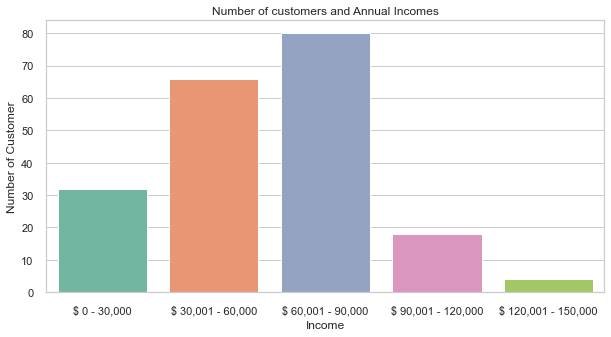

In [13]:
#which spending score has the most customers
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,5))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Numbers of customers and Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

#which range of age has the most customers
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55_above = df.Age[df.Age >= 56]

agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55_above.values)]
                    
plt.figure(figsize=(10,5))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title('Number of customers and ages')
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.show()



#which annual income has the most customers
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(10,5))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Number of customers and Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

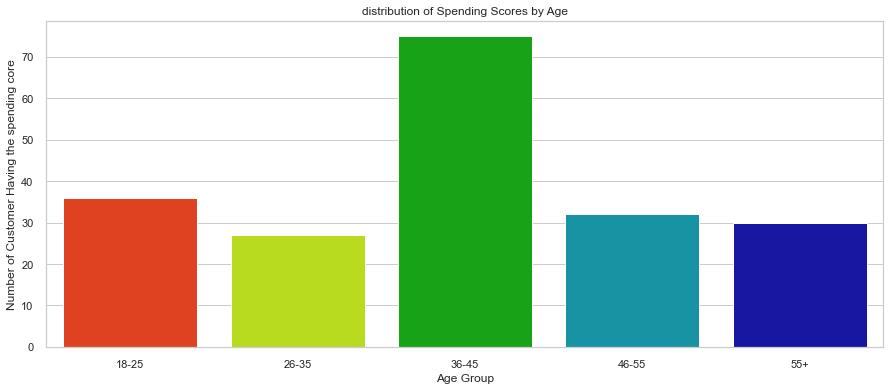

In [14]:
#distribution between age group and spending score
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["18-25", "26-35", "36-45", "46-55", "55+"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("distribution of Spending Scores by Age")
plt.xlabel("Age Group")
plt.ylabel("Number of Customer Having the spending core")
plt.show()

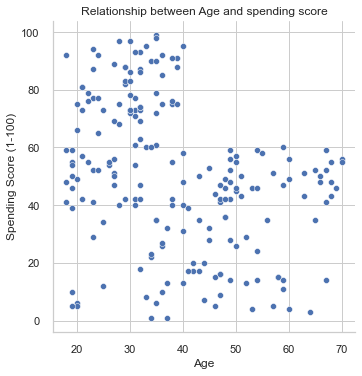

In [15]:
#relationship between Age and spending score
sns.relplot(x="Age", y="Spending Score (1-100)", data=df).set(title='Relationship between Age and spending score')


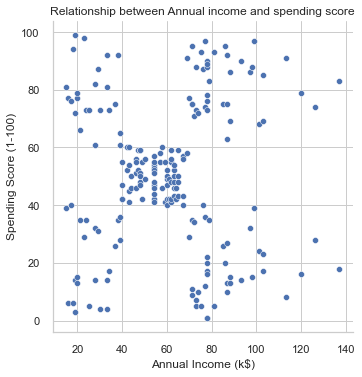

In [16]:
#relationship between anual income and spending score
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df).set(title='Relationship between Annual income and spending score')

In [17]:
#remove gender to adopt to PCA anlysis
features = df.loc[:].values[:,1:]

print(features, features.shape)

[[19 15 39]
 [21 15 81]
 [20 16 6]
 [23 16 77]
 [31 17 40]
 [22 17 76]
 [35 18 6]
 [23 18 94]
 [64 19 3]
 [30 19 72]
 [67 19 14]
 [35 19 99]
 [58 20 15]
 [24 20 77]
 [37 20 13]
 [22 20 79]
 [35 21 35]
 [20 21 66]
 [52 23 29]
 [35 23 98]
 [35 24 35]
 [25 24 73]
 [46 25 5]
 [31 25 73]
 [54 28 14]
 [29 28 82]
 [45 28 32]
 [35 28 61]
 [40 29 31]
 [23 29 87]
 [60 30 4]
 [21 30 73]
 [53 33 4]
 [18 33 92]
 [49 33 14]
 [21 33 81]
 [42 34 17]
 [30 34 73]
 [36 37 26]
 [20 37 75]
 [65 38 35]
 [24 38 92]
 [48 39 36]
 [31 39 61]
 [49 39 28]
 [24 39 65]
 [50 40 55]
 [27 40 47]
 [29 40 42]
 [31 40 42]
 [49 42 52]
 [33 42 60]
 [31 43 54]
 [59 43 60]
 [50 43 45]
 [47 43 41]
 [51 44 50]
 [69 44 46]
 [27 46 51]
 [53 46 46]
 [70 46 56]
 [19 46 55]
 [67 47 52]
 [54 47 59]
 [63 48 51]
 [18 48 59]
 [43 48 50]
 [68 48 48]
 [19 48 59]
 [32 48 47]
 [70 49 55]
 [47 49 42]
 [60 50 49]
 [60 50 56]
 [59 54 47]
 [26 54 54]
 [45 54 53]
 [40 54 48]
 [23 54 52]
 [49 54 42]
 [57 54 51]
 [38 54 55]
 [67 54 41]
 [46 54 44

In [18]:
#dimension reduction: pca analysis 
pca = PCA(n_components=2)
pca.fit(features)
pca_X = pca.transform(features)
print(pca_X)

[[-3.18705078e+01 -3.30014253e+01]
 [ 7.63396908e-01 -5.68438653e+01]
 [-5.74087256e+01 -1.31229362e+01]
 [-2.16989648e+00 -5.34779049e+01]
 [-3.21749197e+01 -3.03870050e+01]
 [-2.17827777e+00 -5.22265808e+01]
 [-5.90660565e+01 -9.54170669e+00]
 [ 1.23693261e+01 -6.16176843e+01]
 [-6.63156568e+01 -3.21359934e+00]
 [-5.65677534e+00 -4.72664534e+01]
 [-5.82366179e+01 -9.13375312e+00]
 [ 1.46202592e+01 -6.21072940e+01]
 [-5.51612126e+01 -1.00779778e+01]
 [-4.30660584e-03 -5.01134367e+01]
 [-5.27647474e+01 -1.16804199e+01]
 [ 1.94563480e+00 -5.15231943e+01]
 [-3.45062349e+01 -2.37600734e+01]
 [-7.30573032e+00 -4.35158724e+01]
 [-4.12574933e+01 -1.64734320e+01]
 [ 1.61888268e+01 -5.82998775e+01]
 [-3.27403118e+01 -2.13349462e+01]
 [-9.82702739e-01 -4.44533143e+01]
 [-5.78102821e+01 -1.86854579e+00]
 [-1.52790692e+00 -4.28591474e+01]
 [-5.04821841e+01 -3.56091922e+00]
 [ 7.68993306e+00 -4.58611728e+01]
 [-3.46334793e+01 -1.50700505e+01]
 [-9.94983869e+00 -3.30231964e+01]
 [-3.38859638e+01 -1

# Part 2

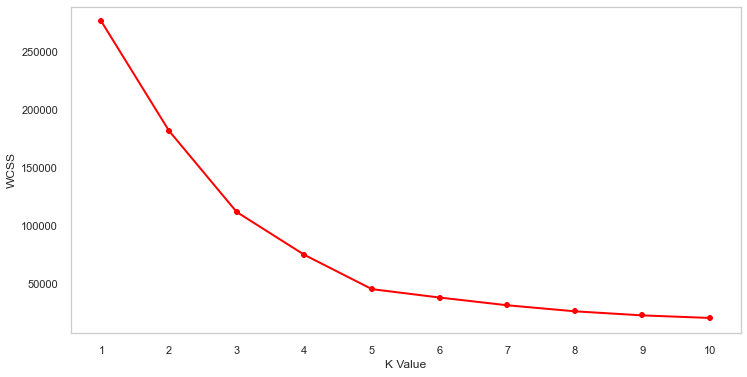

In [19]:
#find optimal numbers of clusters
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(pca_X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

WCSS becomes constant since k value is 5. So take 5 as numbers of clusters

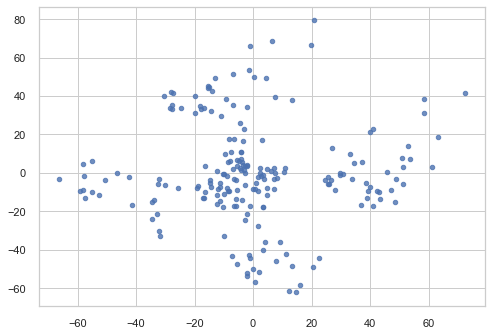

In [20]:
#plot the data after dimension reduction
plt.scatter(pca_X[:, 0], pca_X[:, 1], s = 20, alpha = 0.8)

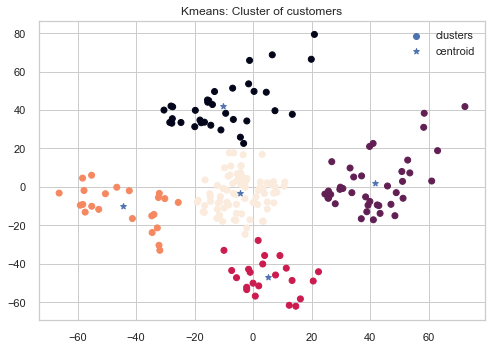

In [21]:
#kmeans model
kmeans = KMeans(n_clusters=5).fit(pca_X)
klabels = kmeans.predict(pca_X)

plt.scatter(pca_X[:, 0], pca_X[:, 1], c=klabels, label='clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], cmap='black', marker='*', label='centroid')
plt.title('Kmeans: Cluster of customers')
plt.legend()


In [22]:
#Evaluate model performance 

#Calculate cluster validation metrics
print('Silhouette Coefﬁcient : %.3f' % metrics.silhouette_score(pca_X, kmeans.labels_, metric='euclidean'))
print('Calinski Harabasz Score: %.3f' % metrics.calinski_harabasz_score(pca_X, kmeans.labels_))
print('Davies Bouldin Score: %.3f' % metrics.davies_bouldin_score(pca_X, klabels))

Silhouette Coefﬁcient : 0.553
Calinski Harabasz Score: 249.136
Davies Bouldin Score: 0.584


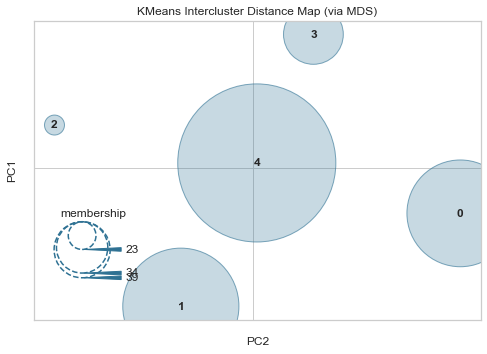

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [23]:
#Check relative size and distribution of the clusters - inter-cluster distance map
visualizer = InterclusterDistance(kmeans)
visualizer.fit(pca_X)        
visualizer.show()

For n_clusters = 2 The average silhouette_score is : 0.3424947000110119
For n_clusters = 4 The average silhouette_score is : 0.49666343022163795
For n_clusters = 5 The average silhouette_score is : 0.5526250183600322
For n_clusters = 6 The average silhouette_score is : 0.5364302947370859
For n_clusters = 7 The average silhouette_score is : 0.5212192828812762


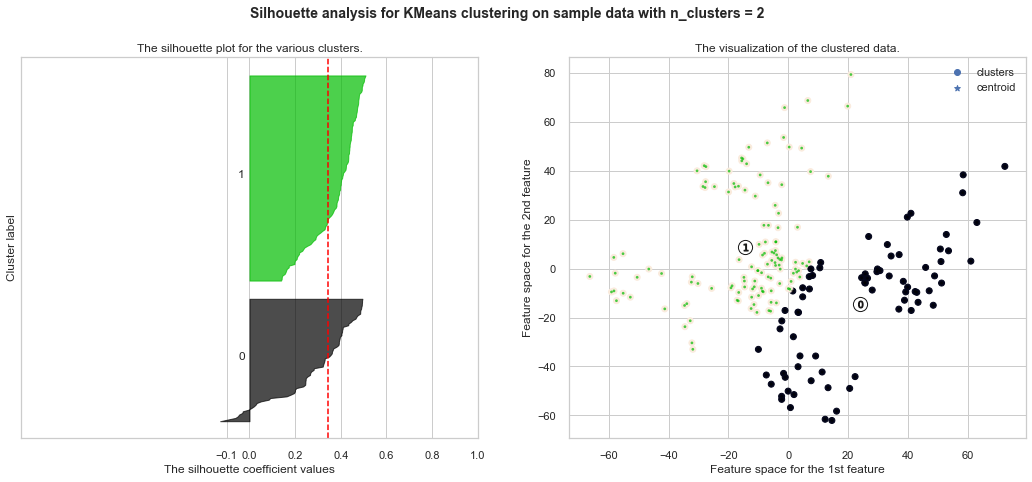

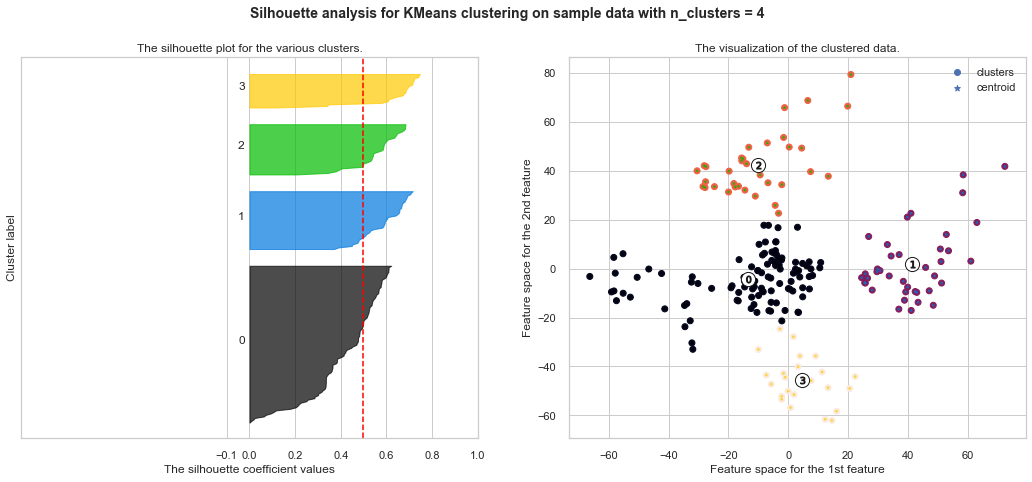

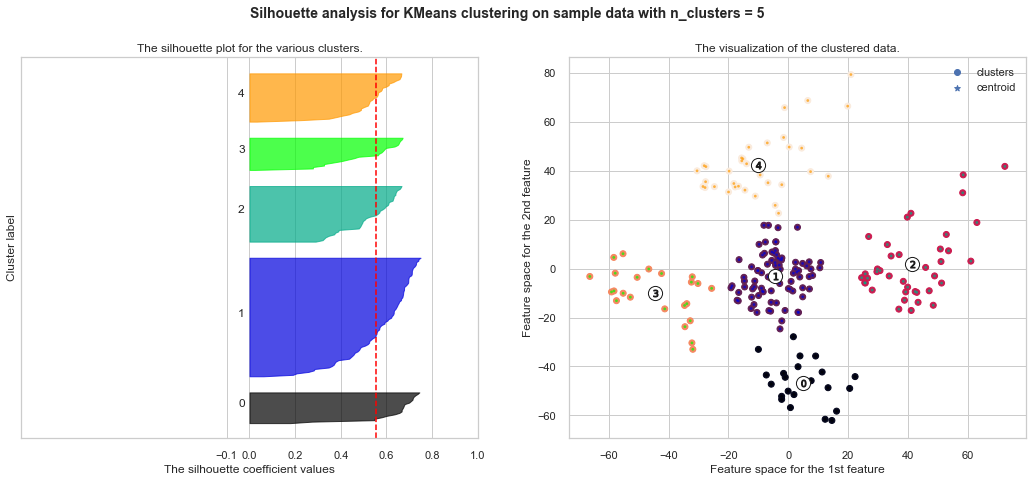

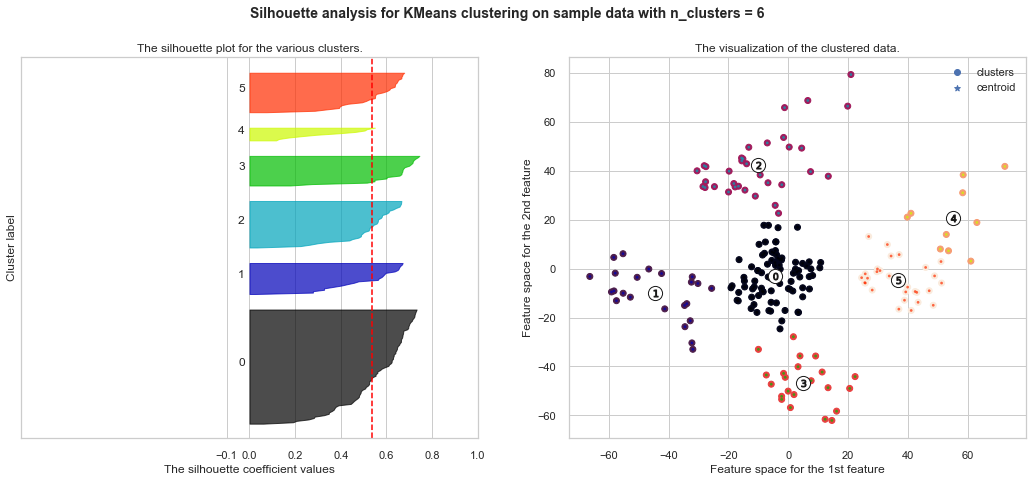

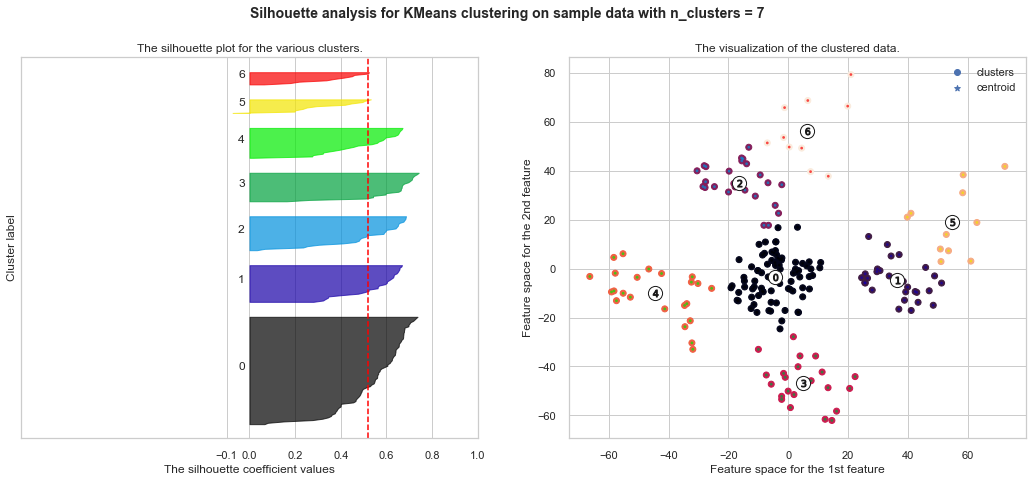

In [24]:
#Validate Sillhousette for different numbers of clusters
range_n_clusters = [2, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(pca_X) + (n_clusters + 1) * 10])
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    klabels = kmeans.fit_predict(pca_X)
    
    plt.scatter(pca_X[:, 0], pca_X[:, 1], c=klabels, label='clusters')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], cmap='black', marker='*', label='centroid')
    plt.title('Kmeans: Cluster of customers')
    plt.legend()

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(pca_X, klabels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(pca_X, klabels)

    y_lower = 10
    
    
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[klabels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(klabels.astype(float) / n_clusters)
    ax2.scatter(pca_X[:, 0], pca_X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    
    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()   


5.1555969064329625


<Figure size 360x360 with 0 Axes>

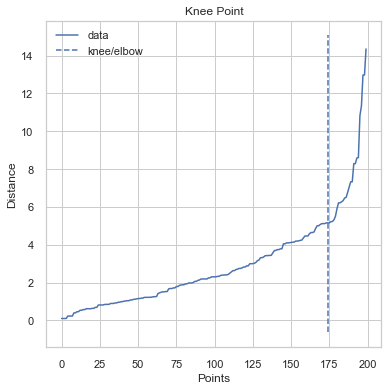

In [25]:
#Find optimal minPts and epochs for DBscan
minPts = 2 * 2 #min_samples parameter as twice the number of features


#calculate the distance from each point to its closest neighbor 
neigh = NearestNeighbors(n_neighbors=4) 
nbrs = neigh.fit(pca_X)
#return the distance to the closest neighbors points & index for each of those points
distances, indices = nbrs.kneighbors(pca_X) 

#sort result
distances = np.sort(distances, axis=0) 
distances = distances[:,1]

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee() #The optimal value for epsilon will be found at the point of maximum curvature
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])


Estimated number of clusters: 9


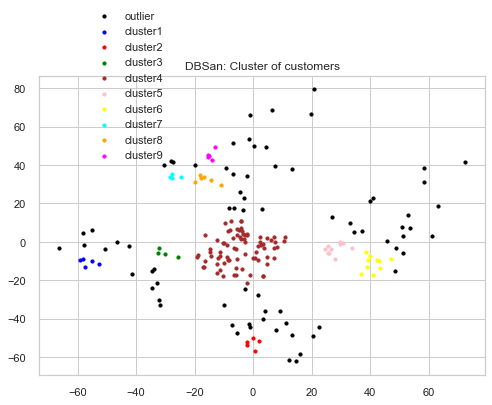

In [26]:
#DBScan clustering

db = DBSCAN(eps=5.1555969064329625, min_samples=minPts, n_jobs=1).fit(pca_X)
dblabels = db.fit_predict(pca_X)

#estimate cluusters
n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

plt.title('DBSan: Cluster of customers')

plt.scatter(pca_X[dblabels == -1, 0], pca_X[dblabels == -1, 1], s = 10, c = 'black', label='outlier')
plt.scatter(pca_X[dblabels == 0, 0], pca_X[dblabels == 0, 1], s = 10, c = 'blue', label='cluster1')
plt.scatter(pca_X[dblabels == 1, 0], pca_X[dblabels == 1, 1], s = 10, c = 'red', label='cluster2')
plt.scatter(pca_X[dblabels == 2, 0], pca_X[dblabels == 2, 1], s = 10, c = 'green', label='cluster3')
plt.scatter(pca_X[dblabels == 3, 0], pca_X[dblabels == 3, 1], s = 10, c = 'brown', label='cluster4')
plt.scatter(pca_X[dblabels == 4, 0], pca_X[dblabels == 4, 1], s = 10, c = 'pink', label='cluster5')
plt.scatter(pca_X[dblabels == 5, 0], pca_X[dblabels == 5, 1], s = 10, c = 'yellow', label='cluster6')
plt.scatter(pca_X[dblabels == 6, 0], pca_X[dblabels == 6, 1], s = 10, c = 'cyan', label='cluster7') 
plt.scatter(pca_X[dblabels == 7, 0], pca_X[dblabels == 7, 1], s = 10, c = 'orange', label='cluster8')
plt.scatter(pca_X[dblabels == 8, 0], pca_X[dblabels == 8, 1], s = 10, c = 'magenta', label='cluster9')

plt.legend(bbox_to_anchor =(0.3, 1.25))

In [27]:
#Evaluate model performance 

#calculate cluster validation metrics
print('Silhouette Coefﬁcient : %.3f' % metrics.silhouette_score(pca_X, dblabels, metric='euclidean'))
print('Calinski Harabasz Score: %.3f' % metrics.calinski_harabasz_score(pca_X, dblabels))
print('Davies Bouldin Score: %.3f' % metrics.davies_bouldin_score(pca_X, dblabels))

Silhouette Coefﬁcient : 0.060
Calinski Harabasz Score: 10.604
Davies Bouldin Score: 1.982
